# Market Analysis In Dublin

## Context

A new city manager for Airbnb has started in Dublin and wants to better understand:

- What guests are searching for in Dublin

- Which inquiries hosts tend to accept.

Based on the findings the new city manager will try to boost the number and quality of hosts in Dublin to fit the demands from guests. The goal of this challenge is to analyze, understand, visualize, and communicate the demand / supply in the market. For example you may want to look at the breakdown of start date day of the week, or number of nights, or room type that is searched for, and how many hosts accepted the reservation. In particular, we are interested in:

- what the gaps are between guest demand and host supply that the new city manager could plug to increase the number of bookings in Dublin,
- what other data would be useful to have to deepen the analysis and understanding.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

sns.set()

## Import Data

In [2]:
contacts = pd.read_csv('datasets/contacts.tsv', sep = '\t')
searches = pd.read_csv('datasets/searches.tsv', sep = '\t')

## Understanding the Data

### Contacts

In [3]:
contacts.shape

(7823, 11)

In [4]:
contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823 entries, 0 to 7822
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_guest        7823 non-null   object
 1   id_host         7823 non-null   object
 2   id_listing      7823 non-null   object
 3   ts_contact_at   7823 non-null   object
 4   ts_reply_at     7219 non-null   object
 5   ts_accepted_at  3627 non-null   object
 6   ts_booking_at   2174 non-null   object
 7   ds_checkin      7823 non-null   object
 8   ds_checkout     7823 non-null   object
 9   n_guests        7823 non-null   int64 
 10  n_messages      7823 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 672.4+ KB


In [5]:
contacts.nunique(axis = 0)

id_guest          3283
id_host           1184
id_listing        1542
ts_contact_at     7805
ts_reply_at       7207
ts_accepted_at    3627
ts_booking_at     2174
ds_checkin         241
ds_checkout        256
n_guests            15
n_messages          54
dtype: int64

In [6]:
contacts.describe()

,n_guests,n_messages
count,7823.000000,7823.000000
mean,2.422600,6.319954
std,1.617347,6.472827
min,1.000000,1.000000
25%,1.000000,2.000000
50%,2.000000,4.000000
75%,3.000000,8.000000
max,16.000000,102.000000


### Searches

In [7]:
searches.shape

(35737, 13)

In [8]:
searches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35737 entries, 0 to 35736
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ds                    35737 non-null  object 
 1   id_user               35737 non-null  object 
 2   ds_checkin            23888 non-null  object 
 3   ds_checkout           23888 non-null  object 
 4   n_searches            35737 non-null  int64  
 5   n_nights              23888 non-null  float64
 6   n_guests_min          35737 non-null  int64  
 7   n_guests_max          35737 non-null  int64  
 8   origin_country        35737 non-null  object 
 9   filter_price_min      13322 non-null  float64
 10  filter_price_max      13322 non-null  float64
 11  filter_room_types     16191 non-null  object 
 12  filter_neighborhoods  1346 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 3.5+ MB


In [9]:
searches.nunique(axis = 0)

ds                         14
id_user                 18605
ds_checkin                385
ds_checkout               422
n_searches                211
n_nights                  207
n_guests_min               16
n_guests_max               16
origin_country            131
filter_price_min          268
filter_price_max          929
filter_room_types         160
filter_neighborhoods      270
dtype: int64

In [10]:
searches.describe()

,n_searches,n_nights,n_guests_min,n_guests_max,filter_price_min,filter_price_max
count,35737.000000,23888.000000,35737.000000,35737.000000,13322.000000,1.332200e+04
mean,9.206565,7.672765,1.742955,2.105857,8.470200,9.019063e+07
std,17.348746,21.557614,1.460440,1.817358,53.987679,2.978482e+08
min,1.000000,0.000000,1.000000,1.000000,0.000000,9.000000e+00
25%,1.000000,2.000000,1.000000,1.000000,0.000000,8.600000e+01
50%,4.000000,3.000000,1.000000,2.000000,0.000000,1.390000e+02
75%,10.000000,5.000000,2.000000,2.000000,0.000000,3.010000e+02
max,448.000000,399.000000,16.000000,16.000000,1250.000000,1.073742e+09


## Project Plan (Ongoing)

Round 1 (COMPLETE): 
- Explore what guests are filtering for in their searches. Which neighbourhoods, which room types, number of guests, number of nights etc.
- Break down of accepted inquiries by these variables (complete)
- How does demand change / do these variables change based on check-in date quarter? (complete)
- Which countries had the highest conversion to accepted bookings? (complete)
- Which room types were most in demand? (complete)
- Which neighbourhoods were most in demand? (complete)
- How can I identify gaps?
    - Ratio of Replies to Accepts?
    - Searches that ultimately didn't lead to a booking, what were the characteristics?

Round 2 (COMPLETE):
- Now that I have isolated Q4 as the peak in check-in interest, can I isolate further for strategic targeting? (complete)
- Can I profile guests? Average stay length by country? Number of searches? (Complete)
- When are guests and hosts most likely to interact? Morning Afternoon Evening? (Complete)
- Can I profile hosts? Most contacted, acceptance rate, rejection rate? (Complete)
- When bookings are accepted, what are the characteristics? (Complete)
    - Correlation matrix / heatmap between booking rate and other variables

Round 3: 
- What are the key messages of all of the analysis so far?
- Do they prompt further questions?
- How do insights relate to our new City Manager's questions?

## Cleaning The Data

In [11]:
contacts.head()

,id_guest,id_host,id_listing,ts_contact_at,ts_reply_at,ts_accepted_at,ts_booking_at,ds_checkin,ds_checkout,n_guests,n_messages
0,000dfad9-459b-4f0b-8310-3d6ab34e4f57,13bb24b8-d432-43a2-9755-5ea11b43bb69,21d2b1a2-fdc3-4b4c-a1f0-0eaf0cc02370,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-13,2014-10-15,2,13
1,00197051-c6cb-4c3a-99e9-86615b819874,46aa3897-9c00-4d76-ac66-a307593d0675,fb5ed09a-9848-4f2c-b2ef-34deb62164fb,2014-11-04 09:10:03.0,2014-11-04 09:45:50.0,2014-11-04 09:45:50.0,2014-11-04 12:20:46.0,2014-11-27,2014-11-30,1,10
2,0027538e-aa9e-4a02-8979-b8397e5d4cba,6bbb88ca-db66-48c5-9c4b-862f7706284a,d3871da6-8012-4dc4-b508-c91f2c10c297,2014-10-10 12:02:50.0,2014-10-10 15:07:01.0,NaN,NaN,2014-10-17,2014-10-19,2,3
3,0027538e-aa9e-4a02-8979-b8397e5d4cba,8772bc85-a9b7-4d85-a52d-41f3620c2912,0d9b5583-8053-4b67-adfe-8c29eb12efed,2014-10-10 15:23:53.0,NaN,NaN,NaN,2014-10-17,2014-10-19,2,2
4,0027538e-aa9e-4a02-8979-b8397e5d4cba,ac162061-55e2-4072-ac91-2e080f9581f2,ec68e0af-b0f2-42c7-b6f8-d41061c083ff,2014-10-10 15:22:26.0,2014-10-10 15:24:26.0,2014-10-10 15:24:26.0,2014-10-10 15:52:42.0,2014-10-17,2014-10-19,2,14


In [12]:
searches.head()

,ds,id_user,ds_checkin,ds_checkout,n_searches,n_nights,n_guests_min,n_guests_max,origin_country,filter_price_min,filter_price_max,filter_room_types,filter_neighborhoods
0,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-12,16,3.0,2,2,IE,0.0,67.0,",Entire home/apt,Entire home/apt,Private room,...",NaN
1,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-19,3,10.0,1,2,IE,0.0,67.0,NaN,NaN
2,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,NaN,NaN,1,NaN,1,1,GB,NaN,NaN,NaN,NaN
3,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,2014-11-08,2014-11-10,11,2.0,1,2,GB,NaN,NaN,",Entire home/apt",NaN
4,2014-10-01,001c04f0-5a94-4ee0-bf5d-3591265256de,NaN,NaN,1,NaN,1,1,IE,NaN,NaN,NaN,NaN


In [13]:
searches[['ds_checkin', 'ds_checkout']] = searches[['ds_checkin', 'ds_checkout']].apply(lambda x: pd.to_datetime(x))
contacts[['ts_contact_at','ts_reply_at','ts_accepted_at','ds_checkin','ds_checkout']] = contacts[['ts_contact_at','ts_reply_at','ts_accepted_at','ds_checkin','ds_checkout']].apply(lambda x: pd.to_datetime(x))

Both filter_room_types and filter_neighborhoods are comma separated lists of values, sometimes / sometimes not starting with a comma, sometimes with duplicate filter parameters. These will need to be converted to one row per value for meaningful analysis to occur.

In [14]:
def explode_column(df, column):
    '''
    A function converting a dataframe with a column that contains a list of values to one with one value per observation based
    on the specified column.
    
    Parameters:
    df (dataframe) : The dataframe to explode.
    column (str) : The string referring to the column containing the list of values
    
    Returns: A dataframe with one row per list entry in the specified column.
    '''
    new_df = df.copy()
    new_df[column] = new_df[column].str.split(',')
    new_df = new_df.explode(column).drop_duplicates()
    new_df = new_df.loc[new_df[column] != '']
    new_df[column] = new_df[column].fillna('No Preference')
    
    return new_df

In [15]:
def quarter_month(df, col):
    df['checkin_month'] = pd.to_datetime(df[col]).dt.month
    df['checkin_quarter']= np.where(df['checkin_month'] < 4, 1,
                                     np.where(df['checkin_month'] < 7, 2,
                                             np.where(df['checkin_month'] < 10,3,4)))
    return df

In [16]:
def extract_hour(df, col, name):
    df['hour'] = df[col].dt.hour
    df.rename({'hour':name}, axis = 1, inplace = True)
    return df

In [17]:
def label_timeofday(df, col, name):
    user_labels = ['Night','Early Morning','Morning','Afternoon','Evening','Night']
    user_ranges = [-1,3,6,12,18,22,24]
    df[name] = pd.cut(df[col], bins = user_ranges, labels = user_labels, ordered = False)
    
    return df

In [18]:
searches_room_split = explode_column(searches, 'filter_room_types')

In [19]:
searches_room_split.head()

,ds,id_user,ds_checkin,ds_checkout,n_searches,n_nights,n_guests_min,n_guests_max,origin_country,filter_price_min,filter_price_max,filter_room_types,filter_neighborhoods
0,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-12,16,3.0,2,2,IE,0.0,67.0,Entire home/apt,NaN
0,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-12,16,3.0,2,2,IE,0.0,67.0,Private room,NaN
1,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-19,3,10.0,1,2,IE,0.0,67.0,No Preference,NaN
2,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,NaT,NaT,1,NaN,1,1,GB,NaN,NaN,No Preference,NaN
3,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,2014-11-08,2014-11-10,11,2.0,1,2,GB,NaN,NaN,Entire home/apt,NaN


In [20]:
searches_neighborhood_split = explode_column(searches, 'filter_neighborhoods')

In [21]:
searches_neighborhood_split.loc[searches_neighborhood_split['filter_neighborhoods'] != 'No Preference'].head()

,ds,id_user,ds_checkin,ds_checkout,n_searches,n_nights,n_guests_min,n_guests_max,origin_country,filter_price_min,filter_price_max,filter_room_types,filter_neighborhoods
48,2014-10-01,02cafb86-5445-45cc-80f2-405291578356,2014-11-01,2014-11-30,2,29.0,2,2,IE,NaN,NaN,NaN,North City Central/O'Connell Street
48,2014-10-01,02cafb86-5445-45cc-80f2-405291578356,2014-11-01,2014-11-30,2,29.0,2,2,IE,NaN,NaN,NaN,Clontarf
50,2014-10-01,034acf8b-056e-483c-9064-735b064bc22a,2014-10-18,2014-10-21,7,3.0,2,2,GB,0.0,326.0,NaN,City Centre
67,2014-10-01,045782ae-8a09-4a56-83b0-60f279657264,2014-12-01,2014-12-10,3,9.0,1,1,US,NaN,NaN,NaN,City Centre
67,2014-10-01,045782ae-8a09-4a56-83b0-60f279657264,2014-12-01,2014-12-10,3,9.0,1,1,US,NaN,NaN,NaN,Ballsbridge


## Exploratory Analysis

### Origin Country

In [22]:
origin_country = searches.groupby('origin_country', as_index = False)[['id_user', 'n_searches']].agg({'id_user':'nunique','n_searches':'sum'})
origin_country['user_count_rank'] = origin_country['id_user'].rank(method = 'dense', ascending = False)
origin_country['total_searches_rank'] = origin_country['n_searches'].rank(method = 'dense', ascending = False)

In [23]:
oc_user_t10 = origin_country.loc[origin_country['user_count_rank'] <= 10][['origin_country','id_user']].sort_values(by = 'id_user', ascending = False)
oc_search_t10 = origin_country.loc[origin_country['total_searches_rank'] <= 10][['origin_country','n_searches']].sort_values(by = 'n_searches', ascending = False)

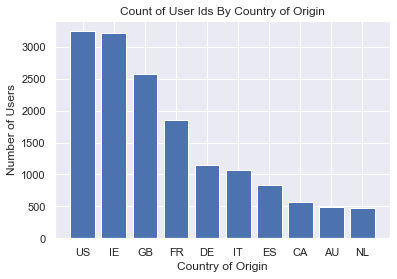

In [24]:
fig, ax = plt.subplots()

_ = ax.bar(oc_user_t10['origin_country'], oc_user_t10['id_user'])
_ = ax.set_xlabel('Country of Origin')
_ = ax.set_ylabel('Number of Users')
_ = ax.set_title('Count of User Ids By Country of Origin')

plt.show()

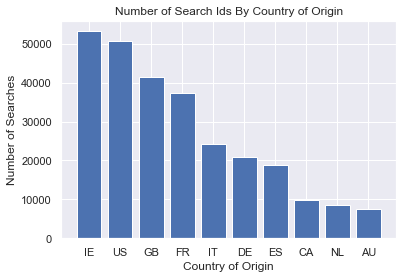

In [25]:
fig, ax = plt.subplots()

_ = ax.bar(oc_search_t10['origin_country'], oc_search_t10['n_searches'])
_ = ax.set_xlabel('Country of Origin')
_ = ax.set_ylabel('Number of Searches')
_ = ax.set_title('Number of Search Ids By Country of Origin')

plt.show()

In [26]:
#Conversion Rate
df_merged = searches.merge(contacts, how = 'left', left_on = 'id_user', right_on = 'id_guest')
df_merged.head()

,ds,id_user,ds_checkin_x,ds_checkout_x,n_searches,n_nights,n_guests_min,n_guests_max,origin_country,filter_price_min,...,id_host,id_listing,ts_contact_at,ts_reply_at,ts_accepted_at,ts_booking_at,ds_checkin_y,ds_checkout_y,n_guests,n_messages
0,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-12,16,3.0,2,2,IE,0.0,...,NaN,NaN,NaT,NaT,NaT,NaN,NaT,NaT,NaN,NaN
1,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-19,3,10.0,1,2,IE,0.0,...,NaN,NaN,NaT,NaT,NaT,NaN,NaT,NaT,NaN,NaN
2,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,NaT,NaT,1,NaN,1,1,GB,NaN,...,NaN,NaN,NaT,NaT,NaT,NaN,NaT,NaT,NaN,NaN
3,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,2014-11-08,2014-11-10,11,2.0,1,2,GB,NaN,...,NaN,NaN,NaT,NaT,NaT,NaN,NaT,NaT,NaN,NaN
4,2014-10-01,001c04f0-5a94-4ee0-bf5d-3591265256de,NaT,NaT,1,NaN,1,1,IE,NaN,...,NaN,NaN,NaT,NaT,NaT,NaN,NaT,NaT,NaN,NaN


Conversion Rate = Count of id_guest with booking /  Total count of id_user 

In [27]:
df_total = df_merged.groupby('origin_country', as_index = False)['id_user'].count()
df_booked = df_merged.loc[~df_merged['ts_booking_at'].isna()].groupby('origin_country', as_index = False)['id_guest'].count()

df_conversion = df_total.merge(df_booked, how = 'outer', on = 'origin_country').fillna(0)
df_conversion['conversion'] = (df_conversion['id_guest'] / df_conversion['id_user'])
df_conversion['conversion_rank'] = df_conversion['conversion'].rank(method = 'dense', ascending = False)
df_conversion = df_conversion.sort_values(by = 'conversion_rank', ascending = True)

conversion_most_searched = df_conversion.loc[df_conversion['origin_country'].isin(oc_search_t10['origin_country'])]

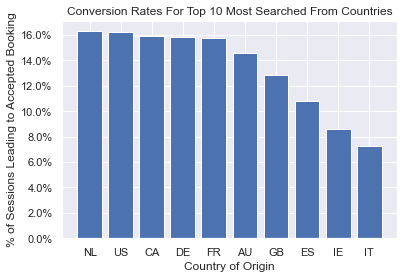

In [28]:
fig, ax = plt.subplots()

_ = ax.bar(conversion_most_searched['origin_country'], conversion_most_searched['conversion'])
_ = ax.set_title('Conversion Rates For Top 10 Most Searched From Countries')
_ = ax.set_xlabel('Country of Origin')
_ = ax.set_ylabel('% of Sessions Leading to Accepted Booking')

ax.yaxis.set_major_formatter(PercentFormatter(1.0))

plt.show()

Perhaps there is some opportunity to form a few hypotheses from the above?

### By Room Type

In [29]:
room_type = searches_room_split.groupby('filter_room_types', as_index = False)['id_user'].nunique()
total_sessions = int(searches_room_split['id_user'].nunique())
total = np.empty((4))
total.fill(total_sessions)
room_type['total_sessions'] = pd.Series(total)
room_type['percent'] = round((room_type['id_user'] / room_type['total_sessions']) * 100,2)
room_type

,filter_room_types,id_user,total_sessions,percent
0,Entire home/apt,8373,18605.0,45.00
1,No Preference,12199,18605.0,65.57
2,Private room,3839,18605.0,20.63
3,Shared room,719,18605.0,3.86


Most users are searching for an entire home / apartment rather than a private or shared room.
Note that a given user can enter more than one room type in a single search.

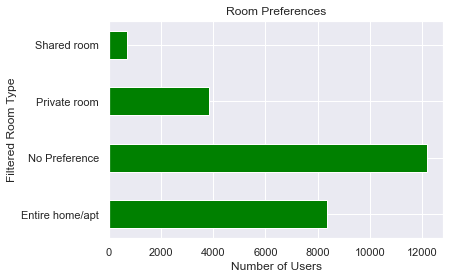

In [30]:
fig, ax = plt.subplots()

_ = ax.barh(y = room_type['filter_room_types'], width = room_type['id_user'], height = 0.5, color = 'green')
_ = ax.set_xlabel('Number of Users')
_ = ax.set_ylabel('Filtered Room Type')
_ = ax.set_title('Room Preferences')

plt.show()

### By Neighborhood

In [31]:
neighborhood_grouped = searches_neighborhood_split.groupby('filter_neighborhoods', as_index = False)['id_user'].nunique()
neighborhood_grouped = neighborhood_grouped.loc[neighborhood_grouped['filter_neighborhoods'] != 'No Preference']
neighborhood_grouped['rank'] = neighborhood_grouped['id_user'].rank(method = 'dense', ascending = False)
neighborhood_t10 = neighborhood_grouped.loc[neighborhood_grouped['rank'] <= 10].sort_values(by = 'rank', ascending = True)
neighborhood_t10

,filter_neighborhoods,id_user,rank
15,City Centre,826,1.0
57,Temple Bar,134,2.0
43,Old City,125,3.0
21,Docklands,71,4.0
48,Ranelagh and Rathmines,55,5.0
60,Trinity College,54,6.0
4,Ballsbridge,51,7.0
41,North City Central/O'Connell Street,51,7.0
22,Donnybrook,31,8.0
31,Grafton Street/St. Stephens Green,30,9.0


C:\Users\Nickf\AppData\Local\Temp/ipykernel_28988/2645927819.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(neighborhood_t10['filter_neighborhoods'].unique(), rotation = 90)


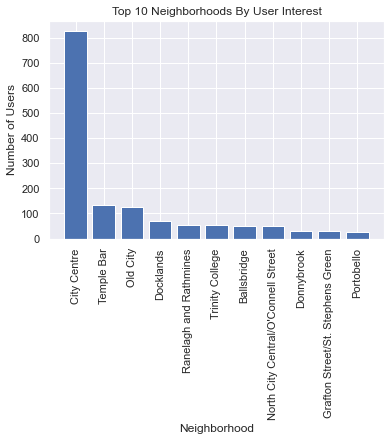

In [32]:
fig, ax = plt.subplots()

_ = ax.bar(neighborhood_t10['filter_neighborhoods'], neighborhood_t10['id_user'])
_ = ax.set_xlabel('Neighborhood')
_ = ax.set_ylabel('Number of Users')
_ = ax.set_title('Top 10 Neighborhoods By User Interest')
_ = ax.set_xticklabels(neighborhood_t10['filter_neighborhoods'].unique(), rotation = 90)

plt.show()

City Centre is overwhelmingly the area of greatest interest. What does the chart look like without it? Is it pretty evenly distributed?

In [33]:
neighborhood_grouped_no_cc = searches_neighborhood_split.groupby('filter_neighborhoods', as_index = False)['id_user'].nunique()
neighborhood_grouped_no_cc = neighborhood_grouped_no_cc.loc[~neighborhood_grouped_no_cc['filter_neighborhoods'].isin(['City Centre', 'No Preference'])]
neighborhood_grouped_no_cc['rank'] = neighborhood_grouped_no_cc['id_user'].rank(method = 'dense', ascending = False)
neighborhood_t10_no_cc = neighborhood_grouped_no_cc.loc[neighborhood_grouped_no_cc['rank'] <= 10].sort_values(by = 'rank', ascending = True)
neighborhood_t10_no_cc

,filter_neighborhoods,id_user,rank
57,Temple Bar,134,1.0
43,Old City,125,2.0
21,Docklands,71,3.0
48,Ranelagh and Rathmines,55,4.0
60,Trinity College,54,5.0
4,Ballsbridge,51,6.0
41,North City Central/O'Connell Street,51,6.0
22,Donnybrook,31,7.0
31,Grafton Street/St. Stephens Green,30,8.0
46,Portobello,25,9.0


C:\Users\Nickf\AppData\Local\Temp/ipykernel_28988/1568423193.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(neighborhood_t10_no_cc['filter_neighborhoods'].unique(), rotation = 90)


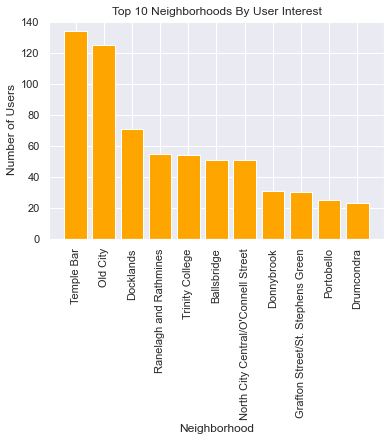

In [34]:
fig, ax = plt.subplots()

_ = ax.bar(neighborhood_t10_no_cc['filter_neighborhoods'], neighborhood_t10_no_cc['id_user'], color = 
          'orange')
_ = ax.set_xlabel('Neighborhood')
_ = ax.set_ylabel('Number of Users')
_ = ax.set_title('Top 10 Neighborhoods By User Interest')
_ = ax.set_xticklabels(neighborhood_t10_no_cc['filter_neighborhoods'].unique(), rotation = 90)

plt.show()

### Over Time

In [35]:
searches = quarter_month(searches, 'ds_checkin')

In [36]:
searches.groupby('checkin_quarter', as_index = False)['id_user'].nunique()

,checkin_quarter,id_user
0,1,1671
1,2,807
2,3,343
3,4,16921


The most searched time for a checkin is Q4 by a landslide

In [37]:
searches_neighborhood_split = quarter_month(searches_neighborhood_split, 'ds_checkin')

Spoiler: City Centre is the most popular neighborhood in every quarter, so i'll automatically exclude it from the next plot.

In [38]:
# Top 10 Neighborhoods For Each Quarter
searches_neighborhood_quarter = searches_neighborhood_split.groupby(['checkin_quarter','filter_neighborhoods'], as_index = False)['id_user'].nunique()

searches_neighborhood_quarter = searches_neighborhood_quarter.loc[~searches_neighborhood_quarter['filter_neighborhoods'].isin(['No Preference','City Centre'])]
searches_neighborhood_quarter['rank'] = searches_neighborhood_quarter.groupby('checkin_quarter')['id_user'].rank(method = 'dense', ascending = False)
searches_neighborhood_quarter_t10 = searches_neighborhood_quarter.loc[searches_neighborhood_quarter['rank'] <= 10].drop('rank', axis = 1)

Note that the y-axis is not shared in the following plot.

C:\Users\Nickf\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


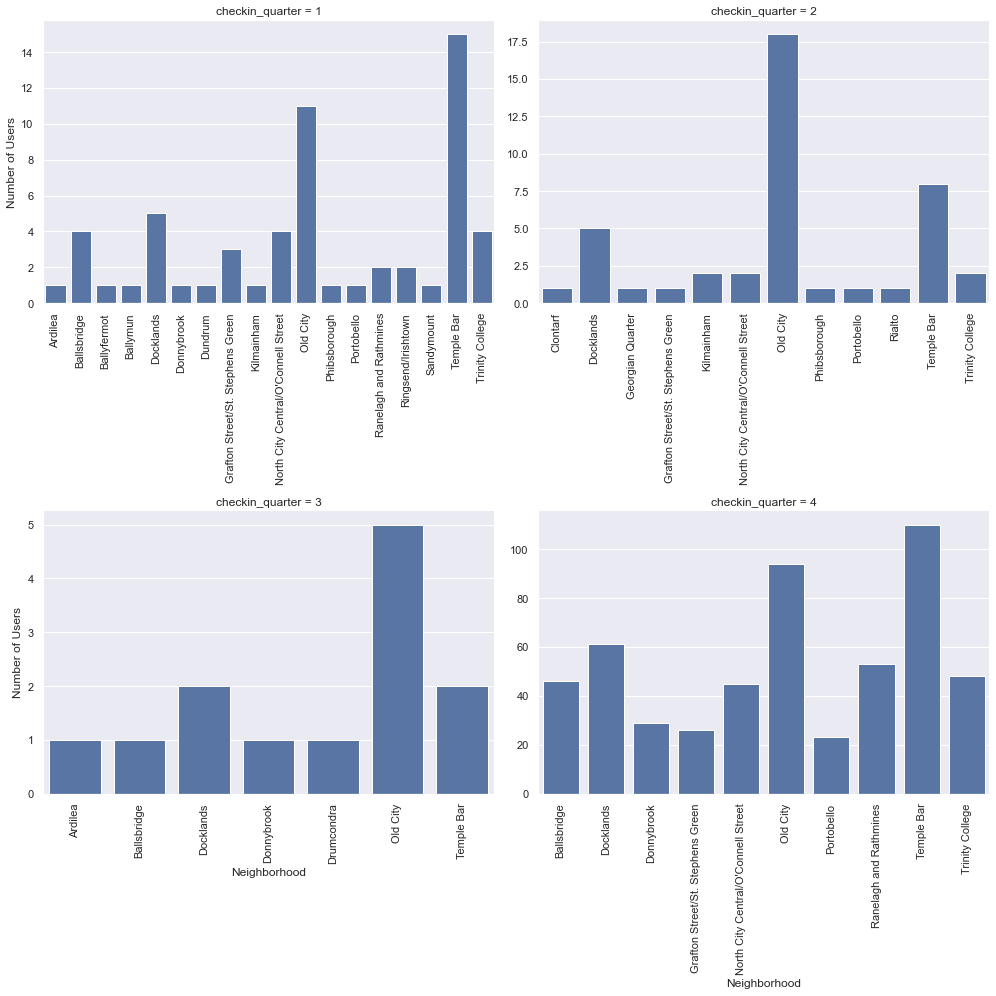

In [39]:
g = sns.FacetGrid(searches_neighborhood_quarter_t10, col = 'checkin_quarter', col_wrap = 2, sharey = False, sharex = False,
                 height = 7, aspect = 1)
g.map(sns.barplot,'filter_neighborhoods', 'id_user')
g.set_xticklabels(rotation = 90)
g.set_axis_labels('Neighborhood','Number of Users')
g.fig.tight_layout()

plt.show()

In [40]:
# Line chart in number of searches over time
searches_time = searches.groupby('ds_checkin')['id_user'].nunique().reset_index()


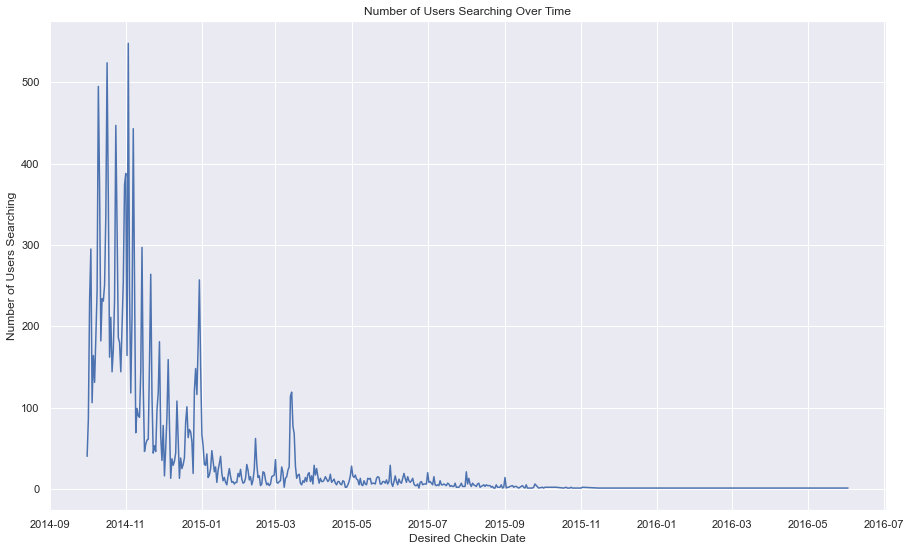

In [41]:
fig, ax = plt.subplots(figsize = (15,9))

ax.plot(searches_time['ds_checkin'], searches_time['id_user'])
ax.set_xlabel('Desired Checkin Date')
ax.set_ylabel('Number of Users Searching')
ax.set_title('Number of Users Searching Over Time')

plt.show()

Let's zoom in on 2014 since that appears to be where the majority of searches took place,

In [42]:
searches_time_2014 = searches_time.loc[searches_time['ds_checkin'].dt.year == 2014]

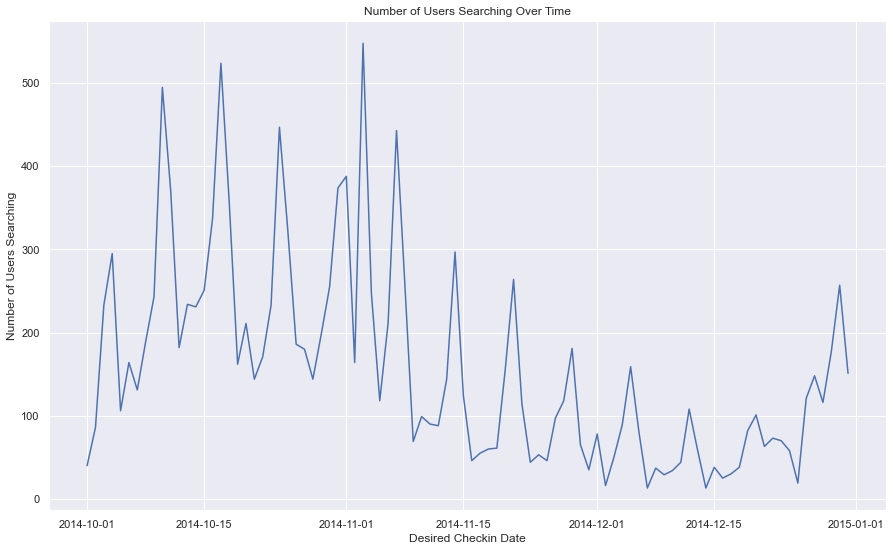

In [43]:
fig, ax = plt.subplots(figsize = (15,9))

ax.plot(searches_time_2014['ds_checkin'], searches_time_2014['id_user'])
ax.set_xlabel('Desired Checkin Date')
ax.set_ylabel('Number of Users Searching')
ax.set_title('Number of Users Searching Over Time')

plt.show()

The peak period for user activity was from the second week of October to the second week of November. Maybe this would be a good period to target moving forward.

## Customer Profiling

In [44]:
searches_stay = searches.copy()
searches_stay['stay_length'] = (searches['ds_checkout'] - searches['ds_checkin']).dt.days
searches_stay = searches_stay.dropna(subset = ['stay_length'])

In [45]:
searches_stay['stay_length'].describe()

count    23888.000000
mean         7.672765
std         21.557614
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max        399.000000
Name: stay_length, dtype: float64

In [46]:
searches_stay.head()

,ds,id_user,ds_checkin,ds_checkout,n_searches,n_nights,n_guests_min,n_guests_max,origin_country,filter_price_min,filter_price_max,filter_room_types,filter_neighborhoods,checkin_month,checkin_quarter,stay_length
0,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-12,16,3.0,2,2,IE,0.0,67.0,",Entire home/apt,Entire home/apt,Private room,...",NaN,10.0,4,3.0
1,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-19,3,10.0,1,2,IE,0.0,67.0,NaN,NaN,10.0,4,10.0
3,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,2014-11-08,2014-11-10,11,2.0,1,2,GB,NaN,NaN,",Entire home/apt",NaN,11.0,4,2.0
5,2014-10-01,004e88da-930b-4209-886f-b58f90fdc67e,2014-10-03,2014-10-05,7,2.0,5,5,SE,NaN,NaN,NaN,NaN,10.0,4,2.0
6,2014-10-01,00623353-97d2-43c9-ac02-1adfecf1aca6,2014-11-01,2014-11-09,6,8.0,1,1,IE,NaN,NaN,"Entire home/apt,Entire home/apt,Private room,P...",NaN,11.0,4,8.0


In [47]:
searches_stay_country = searches_stay.groupby('origin_country', as_index = False)['stay_length'].mean()
searches_stay_country['rank'] = searches_stay_country['stay_length'].rank(method = 'dense', ascending = False)
searches_stay_country_t10 = searches_stay_country.loc[searches_stay_country['rank'] <= 10].sort_values(by = 'rank', ascending = True)
searches_stay_country_t10 = searches_stay_country_t10.sort_values(by = 'rank', ascending = True).drop('rank', axis = 1)
searches_stay_country_t10

,origin_country,stay_length
22,CM,71.000000
17,BR,35.245455
82,MX,31.500000
14,BH,30.666667
9,BB,26.000000
85,NG,23.000000
114,UG,23.000000
78,MO,22.500000
8,BA,22.400000
50,HU,17.653846


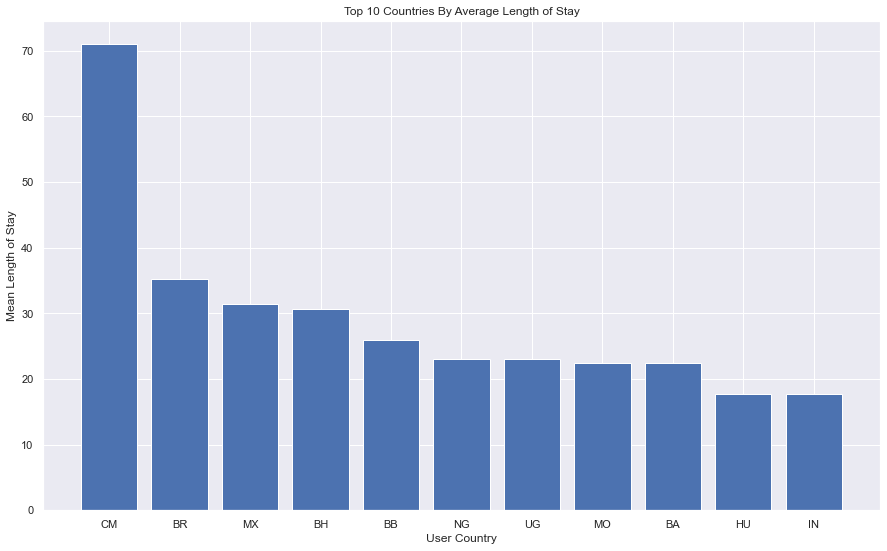

In [48]:
fig, ax = plt.subplots(figsize = (15,9))

_ = ax.bar(searches_stay_country_t10['origin_country'], searches_stay_country_t10['stay_length'])
_ = ax.set_xlabel('User Country')
_ = ax.set_ylabel('Mean Length of Stay')
_ = ax.set_title('Top 10 Countries By Average Length of Stay')

plt.show()

Certain countries, for example Cameroon or Brazil, are looking for longer term residences as long as 2+ months.
Potentially higher turnover with less work (cleaning costs etc.) could be found by targeting these countries as long as users are screened properly beforehand.

In [49]:
searches_stay_quarter = searches_stay.groupby('checkin_quarter', as_index = False)['stay_length'].agg(['mean','median'])
searches_stay_quarter

,mean,median
checkin_quarter,,
1,13.700214,4.0
2,10.824931,4.0
3,12.886214,5.0
4,6.678230,3.0


There is a higher interest for longer term occupation in Q1, decreasing steadily over the course of the year.

## Contact and Reply Profiling

In [50]:
df_hour = extract_hour(contacts, 'ts_contact_at','user_contact_hour')
df_hour = extract_hour(contacts, 'ts_reply_at', 'host_reply_hour')

In [51]:
user_contact = df_hour.groupby('user_contact_hour', as_index = False)['id_guest'].count()
user_contact = label_timeofday(user_contact, 'user_contact_hour','user_contact_tod')

In [52]:
host_reply = df_hour.groupby('host_reply_hour', as_index = False)['id_host'].count()
host_reply = label_timeofday(host_reply,  'host_reply_hour','host_reply_tod')

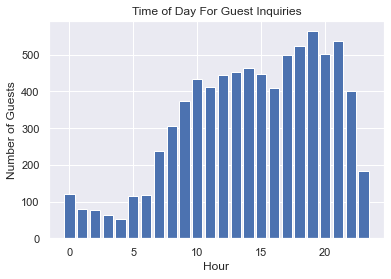

In [53]:
fig, ax = plt.subplots()

_ = ax.bar(user_contact['user_contact_hour'], user_contact['id_guest'])
_ = ax.set_xlabel('Hour')
_ = ax.set_ylabel('Number of Guests')
_ = ax.set_title('Time of Day For Guest Inquiries')

plt.show()

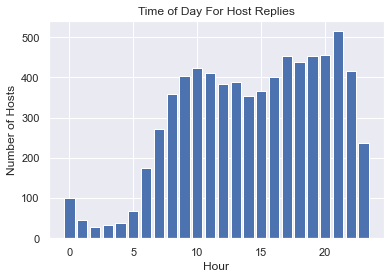

In [54]:
fig, ax = plt.subplots()

_ = ax.bar(host_reply['host_reply_hour'], host_reply['id_host'])
_ = ax.set_xlabel('Hour')
_ = ax.set_ylabel('Number of Hosts')
_ = ax.set_title('Time of Day For Host Replies')

plt.show()

## Host Profiling

In [55]:
# Most frequently contacted hosts
host_contact = contacts.groupby('id_host', as_index = False)['ts_contact_at'].count()
host_contact['rank'] = host_contact['ts_contact_at'].rank(method = 'dense', ascending = False)
host_contact_t10 = host_contact.loc[host_contact['rank'] <= 10, ['id_host','ts_contact_at']]

In [56]:
# Host booking rate
host_acceptance = contacts.groupby('id_host', as_index = False)['ts_booking_at'].count()
host_acceptance = host_acceptance.loc[host_acceptance['id_host'].isin(host_contact_t10['id_host'])]

In [57]:
host_booking_rate = host_contact_t10.merge(host_acceptance, how = 'inner', on = 'id_host')
host_booking_rate['booking_rate'] = (host_booking_rate['ts_booking_at'] / host_booking_rate['ts_contact_at']) * 100
host_booking_rate.sort_values(by = 'booking_rate', ascending = True)

,id_host,ts_contact_at,ts_booking_at,booking_rate
9,f0308f7c-7d2f-45a0-8f7c-a497c73ae065,49,1,2.040816
6,a33e4240-6a0c-47b4-b866-45f9b5952c18,60,8,13.333333
5,86b39b70-965b-479d-a0b0-719b195acea2,172,24,13.953488
3,64facbb7-f52c-4794-a666-76b5b00a816f,59,9,15.254237
4,6bbb88ca-db66-48c5-9c4b-862f7706284a,109,20,18.348624
0,2e2865d6-7471-4ff1-b4cd-7f9a794d7267,81,15,18.518519
8,d5bf9afd-9572-4f60-955e-02706cc7130a,119,31,26.050420
2,5ccbd667-e9e4-4c34-839e-fb438d797925,46,13,28.260870
1,3e3ec72a-d0e6-4355-955d-0a0ac3119e8e,48,21,43.750000
7,becd48ad-623e-4821-9538-e9d8f84f1cac,108,65,60.185185


Examining the individual contacts for Top 10 most contacted hosts might provide some ideas for increasing conversion to bookings - especially those with a proportionally low booking rate.

In [58]:
#What are the characteristics of contacts that hosts tend to accept
booking_characteristics = contacts.merge(searches, how = 'inner', left_on = 'id_guest', right_on = 'id_user')
booking_characteristics.loc[:, ['ts_accepted_at','n_guests','n_guests', 'n_messages','n_nights',
       'n_guests_min', 'n_guests_max', 'origin_country', 'filter_price_min',
       'filter_price_max', 'checkin_month', 'checkin_quarter']]
booking_characteristics['acceptedYN'] = np.where(booking_characteristics['ts_accepted_at'].isna(),0,1)
booking_characteristics = booking_characteristics.drop('ts_accepted_at', axis = 1)

corr_matrix = booking_characteristics.corr()

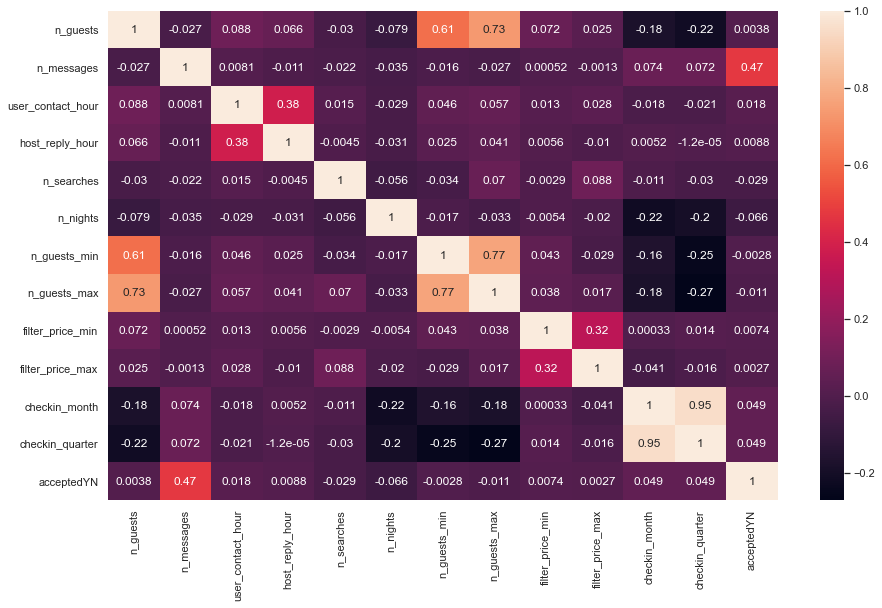

In [59]:
fig, ax = plt.subplots(figsize = (15,9))

_ = sns.heatmap(corr_matrix, annot = True, ax = ax)
plt.show()

Acceptance seems to have a mild, positive correlation (.47) with the number of messages between the host and the guest.

In [60]:
#Acceptance Rate By Country
acceptance_country = contacts.merge(searches, how = 'inner', left_on = 'id_guest', right_on = 'id_user')
ac_summary = acceptance_country.groupby('origin_country')[['id_user','ts_accepted_at']].agg('count')
ac_summary['acceptance_rate'] = (ac_summary['ts_accepted_at'] / ac_summary['id_user'])*100
ac_summary['rank'] = ac_summary['ts_accepted_at'].rank(method = 'dense', ascending = False)
ac_summary = ac_summary.loc[ac_summary['rank'] <= 10].sort_values(by = 'rank', ascending = True)
ac_summary.describe()

,id_user,ts_accepted_at,acceptance_rate,rank
count,10.000000,10.000000,10.000000,10.00000
mean,2290.200000,1007.900000,44.188945,5.50000
std,1340.005041,609.736273,3.688567,3.02765
min,585.000000,268.000000,37.711189,1.00000
25%,1128.500000,491.500000,41.301144,3.25000
50%,2432.500000,988.500000,44.664414,5.50000
75%,3208.250000,1448.750000,47.573067,7.75000
max,4298.000000,2050.000000,48.534202,10.00000


## Key Takeaways

1. What are guests searching for in Dublin?
    - The largest proportion of guests are looking for an entire house / apartment. Very few are looking for shared living arrangements.
    - The overwhelming majority of prospective guests are looking for residences in the City Centre. Other searches are more evenly distributed across Temple Bar, and Old City.
    - On average, guests are looking to stay for 3 days (median). A minority of guests are searching for longer term residences (>= 1 month).
    - The majority of searches are taking place from the middle of October to the middle of November.

2. Which inquiries do hosts tend to accept?
    - Higher acceptance rates are moderately correlated with a greater number of messages, meaning hosts potentially value guests who are communicative.
    - The greatest number of acceptances come from first-world, wealthy countries. On average, these countries have about a 44% acceptance rate. There are a handful of countries with a ~100% acceptance rate but these only have a small number of actual entries 

What the gaps are between guest demand and host supply that the new city manager could plug to increase the number of bookings in Dublin
- Potential market to get into longer term rentals marketed to countries in South America or Africa
- Increasing availability of residences during peak search periods (October - November), in particular full homes and apartments.
- Increasing volume of available residence and rooms in key areas like Temple Bar, Old City, and in particular: City Centre.
- Encouraging prospective guests to proactively communicate with hosts to ensure greater confidence and willingness to accept proposals.
